# Salinity figures for PanAntarctic comparison

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.path as mpath
import xarray as xr
import cf_xarray
import cmocean as cm
import pandas as pd
from pathlib import Path

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import gridspec

## Mapping

In [4]:
# Shelf mask

def shelf_mask_isobath(var, model_dict):

    paths = {
             "mom5": "/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz",
             "mom6_01": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc",
            "mom6_005": "/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc"
             }

    var = var.cf.sel({'latitude': slice(-90, -59)})

    if paths[model_dict][-3:] == '.nc':
        shelf_mask = xr.open_dataset(paths[model_dict])['contour_masked_above']
    else:
        contour_file = np.load(paths[model_dict])
        shelf_mask = xr.DataArray(contour_file['contour_masked_above'],
                                  coords = var.coords, 
                                  dims = var.dims,
                                  name = 'contour_masked_above')
    
    shelf_mask = xr.where(shelf_mask == 0, 1, 0)
    masked_var = var * shelf_mask
    
    return masked_var, shelf_mask

In [5]:
# Land and contour data
shelf_contour_1 = xr.open_dataset('/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_01deg.nc')['contour_masked_above']
depth_1 = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output050/20050501.ocean_static.nc')['deptho']
land_mask_1 = (0 * depth_1).fillna(1)
land_1 = xr.where(np.isnan(depth_1.rename('land_1')), 1, np.nan)

depth_2 = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091_21mbath/output012/ocean/ocean_grid.nc')['ht']
land_mask_2 = (0 * depth_2).fillna(1)
land_2 = xr.where(np.isnan(depth_2.rename('land_2')), 1, np.nan)
depth_2_shelf, shelf_contour_2 = shelf_mask_isobath(depth_2, 'mom5')

## Regional time series

Called temp but is actually wfo, just saving time by not renaming.

In [10]:
# Importing data
pan01_bottemp_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Adelie_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Adelie_prescribed_ACCESS.nc', chunks = 'auto')

pan01_bottemp_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Ross_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Ross_prescribed_ACCESS.nc', chunks = 'auto')

pan01_bottemp_3 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Am_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_3 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Am_prescribed_ACCESS.nc', chunks = 'auto')

pan01_bottemp_4 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Be_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_4 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Be_prescribed_ACCESS.nc', chunks = 'auto')

pan01_bottemp_5 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Weddell_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_5 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Weddell_prescribed_ACCESS.nc', chunks = 'auto')

pan01_bottemp_6 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Prydz_prescribed_pan01.nc', chunks = 'auto') 
acc_bottemp_6 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/wfo_anom_Prydz_prescribed_ACCESS.nc', chunks = 'auto')

In [11]:
pan01_bottemp_1_new = pan01_bottemp_1.to_series()
acc_bottemp_1_new = acc_bottemp_1.to_series()

pan01_bottemp_2_new = pan01_bottemp_2.to_series()
acc_bottemp_2_new = acc_bottemp_2.to_series()

pan01_bottemp_3_new = pan01_bottemp_3.to_series()
acc_bottemp_3_new = acc_bottemp_3.to_series()

pan01_bottemp_4_new = pan01_bottemp_4.to_series()
acc_bottemp_4_new = acc_bottemp_4.to_series()

pan01_bottemp_5_new = pan01_bottemp_5.to_series()
acc_bottemp_5_new = acc_bottemp_5.to_series()

pan01_bottemp_6_new = pan01_bottemp_6.to_series()
acc_bottemp_6_new = acc_bottemp_6.to_series()


In [12]:
# Slice 1910–1919 and 2001–2010
pan01_bottemp_1_new = pan01_bottemp_1_new['2001-01-01':'2010-12-16']
pan01_bottemp_2_new = pan01_bottemp_2_new['2001-01-01':'2010-12-16']
pan01_bottemp_3_new = pan01_bottemp_3_new['2001-01-01':'2010-12-16']
pan01_bottemp_4_new = pan01_bottemp_4_new['2001-01-01':'2010-12-16']
pan01_bottemp_5_new = pan01_bottemp_5_new['2001-01-01':'2010-12-16']
pan01_bottemp_6_new = pan01_bottemp_6_new['2001-01-01':'2010-12-16']

acc_bottemp_1_new = acc_bottemp_1_new['1910-01-01':'1919-12-16']
acc_bottemp_2_new = acc_bottemp_2_new['1910-01-01':'1919-12-16']
acc_bottemp_3_new = acc_bottemp_3_new['1910-01-01':'1919-12-16']
acc_bottemp_4_new = acc_bottemp_4_new['1910-01-01':'1919-12-16']
acc_bottemp_5_new = acc_bottemp_5_new['1910-01-01':'1919-12-16']
acc_bottemp_6_new = acc_bottemp_6_new['1910-01-01':'1919-12-16']

In [13]:
# Reset index to normalized months
pan01_bottemp_1_new.index = range(0, len(pan01_bottemp_1_new))
acc_bottemp_1_new.index = range(0, len(acc_bottemp_1_new))

pan01_bottemp_2_new.index = range(0, len(pan01_bottemp_2_new))
acc_bottemp_2_new.index = range(0, len(acc_bottemp_2_new))

pan01_bottemp_3_new.index = range(0, len(pan01_bottemp_3_new))
acc_bottemp_3_new.index = range(0, len(acc_bottemp_3_new))

pan01_bottemp_4_new.index = range(0, len(pan01_bottemp_4_new))
acc_bottemp_4_new.index = range(0, len(acc_bottemp_4_new))

pan01_bottemp_5_new.index = range(0, len(pan01_bottemp_5_new))
acc_bottemp_5_new.index = range(0, len(acc_bottemp_5_new))

pan01_bottemp_6_new.index = range(0, len(pan01_bottemp_6_new))
acc_bottemp_6_new.index = range(0, len(acc_bottemp_6_new))

In [14]:
path_to_ocean_static = Path('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output021/20000701.ocean_static.nc')
ocean_static = xr.open_dataset(path_to_ocean_static)

deptho = ocean_static['deptho']
xh = ocean_static['xh']
yh = ocean_static['yh']

#### Combining the plots

/jobfs/152063779.gadi-pbs/ipykernel_73547/3711206184.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


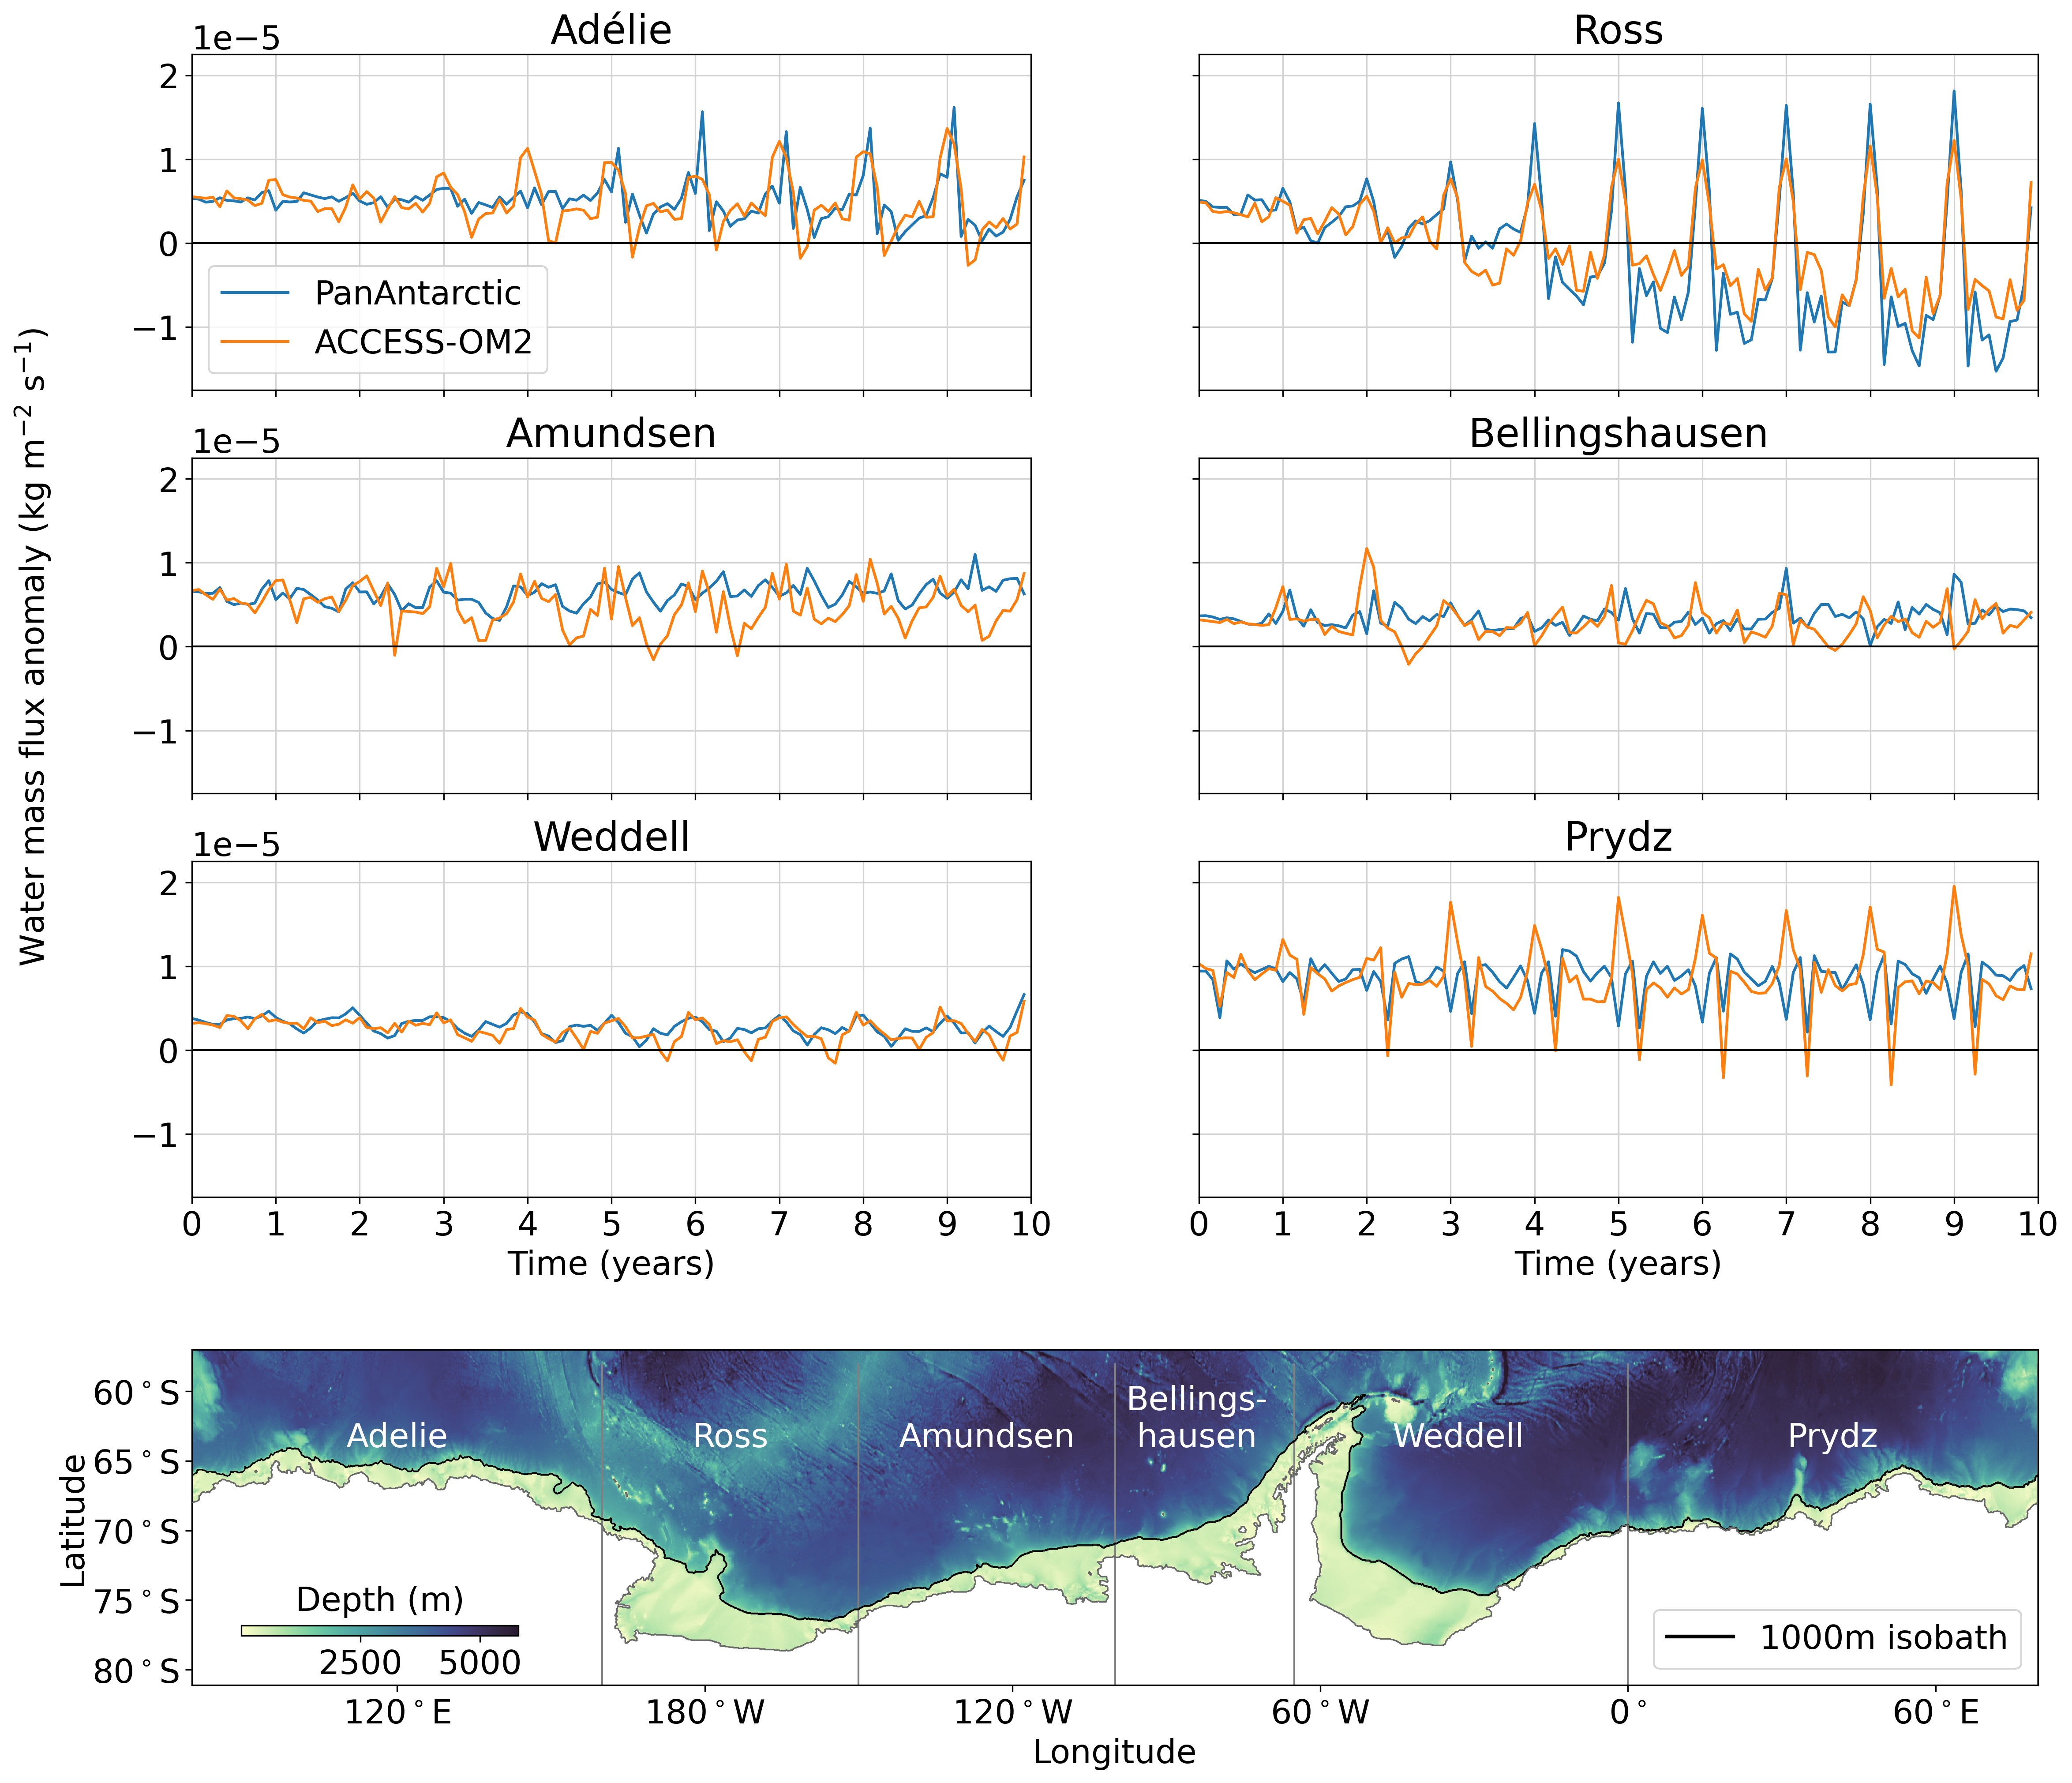

In [30]:
plt.rcParams['font.size'] = 18

# --- Create figure with 5 rows (spacer row before bathy) ---
fig = plt.figure(figsize=(18, 16), dpi=300)
gs = gridspec.GridSpec(
    nrows=5, ncols=2,
    height_ratios=[1, 1, 1, 0.05, 1],  # small spacer row before bathy
    figure=fig,
    hspace=0.25  # small space between top three rows
)

# --- Time series axes (rows 0-2) ---
axes = [fig.add_subplot(gs[i]) for i in range(6)]  # rows 0-2

# First subplot: 
pan01_bottemp_1_new.plot(ax=axes[0], label="PanAntarctic")
acc_bottemp_1_new.plot(ax=axes[0], label="ACCESS-OM2")
axes[0].legend(loc="lower left")
axes[0].set_title("Adélie")

# Second subplot: 
pan01_bottemp_2_new.plot(ax=axes[1], label="PanAntarctic")
acc_bottemp_2_new.plot(ax=axes[1], label="ACCESS-OM2")
axes[1].set_title("Ross")

# Third subplot: 
pan01_bottemp_3_new.plot(ax=axes[2], label="PanAntarctic")
acc_bottemp_3_new.plot(ax=axes[2], label="ACCESS-OM2")
axes[2].set_title("Amundsen")

# Fourth subplot: 
pan01_bottemp_4_new.plot(ax=axes[3], label="PanAntarctic")
acc_bottemp_4_new.plot(ax=axes[3], label="ACCESS-OM2")
axes[3].set_title("Bellingshausen")

# Fifth subplot: 
pan01_bottemp_5_new.plot(ax=axes[4], label="PanAntarctic")
acc_bottemp_5_new.plot(ax=axes[4], label="ACCESS-OM2")
axes[4].set_title("Weddell")

# Sixth subplot: 
pan01_bottemp_6_new.plot(ax=axes[5], label="PanAntarctic")
acc_bottemp_6_new.plot(ax=axes[5], label="ACCESS-OM2")
axes[5].set_title("Prydz")


# Apply consistent y-limits, grid, horizontal line
for ax in axes:
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_ylim(-1.75e-5, 2.25e-5)
    ax.set_xlim(0,10)
    ax.grid(True, color='lightgrey')

# Remove y-axis ticks from right column
for ax in axes[1::2]:
    ax.set_yticklabels([])

# Common Y label
fig.text(0.05, 0.6, "Water mass flux anomaly (kg m$^{-2}$ s$^{-1}$)", va='center', rotation='vertical')

# X-ticks
ticks = range(0, 121, 12)
labels = [str(i) for i in range(len(ticks))]
plt.setp(axes, xticks=ticks, xticklabels=labels)

# Only bottom row gets x-axis labels
for ax in axes[:-2]:
    ax.set_xlabel("")
    ax.set_xticklabels([])
for ax in axes[-2:]:
    ax.set_xlabel("Time (years)")

# --- Bathymetry panel (fifth row, after spacer) ---
ax_bathy = fig.add_subplot(gs[4, :])  # spans both columns
h_plot = deptho.plot(ax=ax_bathy, cmap=cm.cm.deep, add_colorbar=False)

# Colorbar inside bottom-left of bathy plot, label above
cax = inset_axes(ax_bathy,
                 width="15%",    # width relative to axes
                 height="3%",    # height relative to axes
                 loc='lower left',
                 borderpad=1.5)
cbar = fig.colorbar(h_plot, cax=cax, orientation='horizontal')
cax.xaxis.set_label_position('top')
cbar.set_label("Depth (m)", labelpad=8)

# Contours
ax_bathy.contour(shelf_contour_1.cf['X'], shelf_contour_1.cf['Y'], shelf_contour_1,
                 levels=[0.5], colors='black', linewidths=0.5, zorder=4)
ax_bathy.contour(land_mask_1.cf['X'], land_mask_1.cf['Y'], land_mask_1,
                 levels=[0.5], colors='dimgrey', linewidths=0.8, zorder=5)

# Region lines + labels
ax_bathy.vlines([-280, -200, -150, -100, -65, 0, 80], -82, -58, color='grey', linewidth=1)
region_labels = ['Adelie', 'Ross', 'Amundsen', 'Bellings-\nhausen', 'Weddell', 'Prydz']
region_lons   = [-240, -175, -125, -84, -33, 40]
for x, name in zip(region_lons, region_labels):
    ax_bathy.text(x, -64.5, name, ha='center', va='bottom', color='w')

# Fake legend
ax_bathy.plot([0, 1], [0, 1], color='k', linewidth=2, label='1000m isobath')
ax_bathy.legend(loc='lower right')

# Axes labels, ticks
ax_bathy.set_ylabel('Latitude', labelpad = 2)
ax_bathy.set_xlabel('Longitude')
ax_bathy.set_ylim(min(yh.values), -57)
ax_bathy.set_xticks([-240, -180, -120, -60, 0, 60])
ax_bathy.set_xticklabels(('120$^\circ$E', '180$^\circ$W', '120$^\circ$W',
                          '60$^\circ$W', '0$^\circ$', '60$^\circ$E'))
ax_bathy.set_yticks([-80, -75, -70, -65, -60])
ax_bathy.set_yticklabels(('80$^\circ$S', '75$^\circ$S', '70$^\circ$S',
                          '65$^\circ$S', '60$^\circ$S'))

plt.tight_layout()
fig.savefig("/g/data/g40/kc5856/thesis_figures/intermodel_surfacefluxes_wfo_regional.png",
            dpi=300, bbox_inches='tight')
plt.show()


# Surface salinity

In [18]:
# Importing data
pan01_topsalt_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Adelie_prescribed_pan01.nc', chunks = 'auto') 
acc_topsalt_1 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Adelie_prescribed_ACCESS.nc', chunks = 'auto')

pan01_topsalt_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Ross_prescribed_pan01.nc', chunks = 'auto') 
acc_topsalt_2 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Ross_prescribed_ACCESS.nc', chunks = 'auto')

pan01_topsalt_3 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Am_prescribed_pan01.nc', chunks = 'auto') 
acc_topsalt_3 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Am_prescribed_ACCESS.nc', chunks = 'auto')

pan01_topsalt_4 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Be_prescribed_pan01.nc', chunks = 'auto') 
acc_topsalt_4 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Be_prescribed_ACCESS.nc', chunks = 'auto')

pan01_topsalt_5 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Weddell_prescribed_pan01.nc', chunks = 'auto') 
acc_topsalt_5 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Weddell_prescribed_ACCESS.nc', chunks = 'auto')

pan01_topsalt_6 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Prydz_prescribed_pan01.nc', chunks = 'auto') 
acc_topsalt_6 = xr.open_dataarray('/g/data/g40/kc5856/thesis_figures/data_files/saltflux_anom_Prydz_prescribed_ACCESS.nc', chunks = 'auto')

In [19]:
pan01_topsalt_1_new = pan01_topsalt_1.to_series()
acc_topsalt_1_new = acc_topsalt_1.to_series()

pan01_topsalt_2_new = pan01_topsalt_2.to_series()
acc_topsalt_2_new = acc_topsalt_2.to_series()

pan01_topsalt_3_new = pan01_topsalt_3.to_series()
acc_topsalt_3_new = acc_topsalt_3.to_series()

pan01_topsalt_4_new = pan01_topsalt_4.to_series()
acc_topsalt_4_new = acc_topsalt_4.to_series()

pan01_topsalt_5_new = pan01_topsalt_5.to_series()
acc_topsalt_5_new = acc_topsalt_5.to_series()

pan01_topsalt_6_new = pan01_topsalt_6.to_series()
acc_topsalt_6_new = acc_topsalt_6.to_series()

In [20]:
# Slice 1910–1919 and 2001–2010
pan01_topsalt_1_new = pan01_topsalt_1_new['2001-01-01':'2010-12-16']
pan01_topsalt_2_new = pan01_topsalt_2_new['2001-01-01':'2010-12-16']
pan01_topsalt_3_new = pan01_topsalt_3_new['2001-01-01':'2010-12-16']
pan01_topsalt_4_new = pan01_topsalt_4_new['2001-01-01':'2010-12-16']
pan01_topsalt_5_new = pan01_topsalt_5_new['2001-01-01':'2010-12-16']
pan01_topsalt_6_new = pan01_topsalt_6_new['2001-01-01':'2010-12-16']

acc_topsalt_1_new = acc_topsalt_1_new['1910-01-01':'1919-12-16']
acc_topsalt_2_new = acc_topsalt_2_new['1910-01-01':'1919-12-16']
acc_topsalt_3_new = acc_topsalt_3_new['1910-01-01':'1919-12-16']
acc_topsalt_4_new = acc_topsalt_4_new['1910-01-01':'1919-12-16']
acc_topsalt_5_new = acc_topsalt_5_new['1910-01-01':'1919-12-16']
acc_topsalt_6_new = acc_topsalt_6_new['1910-01-01':'1919-12-16']

In [21]:
# Reset index to normalized months
pan01_topsalt_1_new.index = range(0, len(pan01_topsalt_1_new))
acc_topsalt_1_new.index = range(0, len(acc_topsalt_1_new))

pan01_topsalt_2_new.index = range(0, len(pan01_topsalt_2_new))
acc_topsalt_2_new.index = range(0, len(acc_topsalt_2_new))

pan01_topsalt_3_new.index = range(0, len(pan01_topsalt_3_new))
acc_topsalt_3_new.index = range(0, len(acc_topsalt_3_new))

pan01_topsalt_4_new.index = range(0, len(pan01_topsalt_4_new))
acc_topsalt_4_new.index = range(0, len(acc_topsalt_4_new))

pan01_topsalt_5_new.index = range(0, len(pan01_topsalt_5_new))
acc_topsalt_5_new.index = range(0, len(acc_topsalt_5_new))

pan01_topsalt_6_new.index = range(0, len(pan01_topsalt_6_new))
acc_topsalt_6_new.index = range(0, len(acc_topsalt_6_new))

/jobfs/152063779.gadi-pbs/ipykernel_73547/4011712312.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


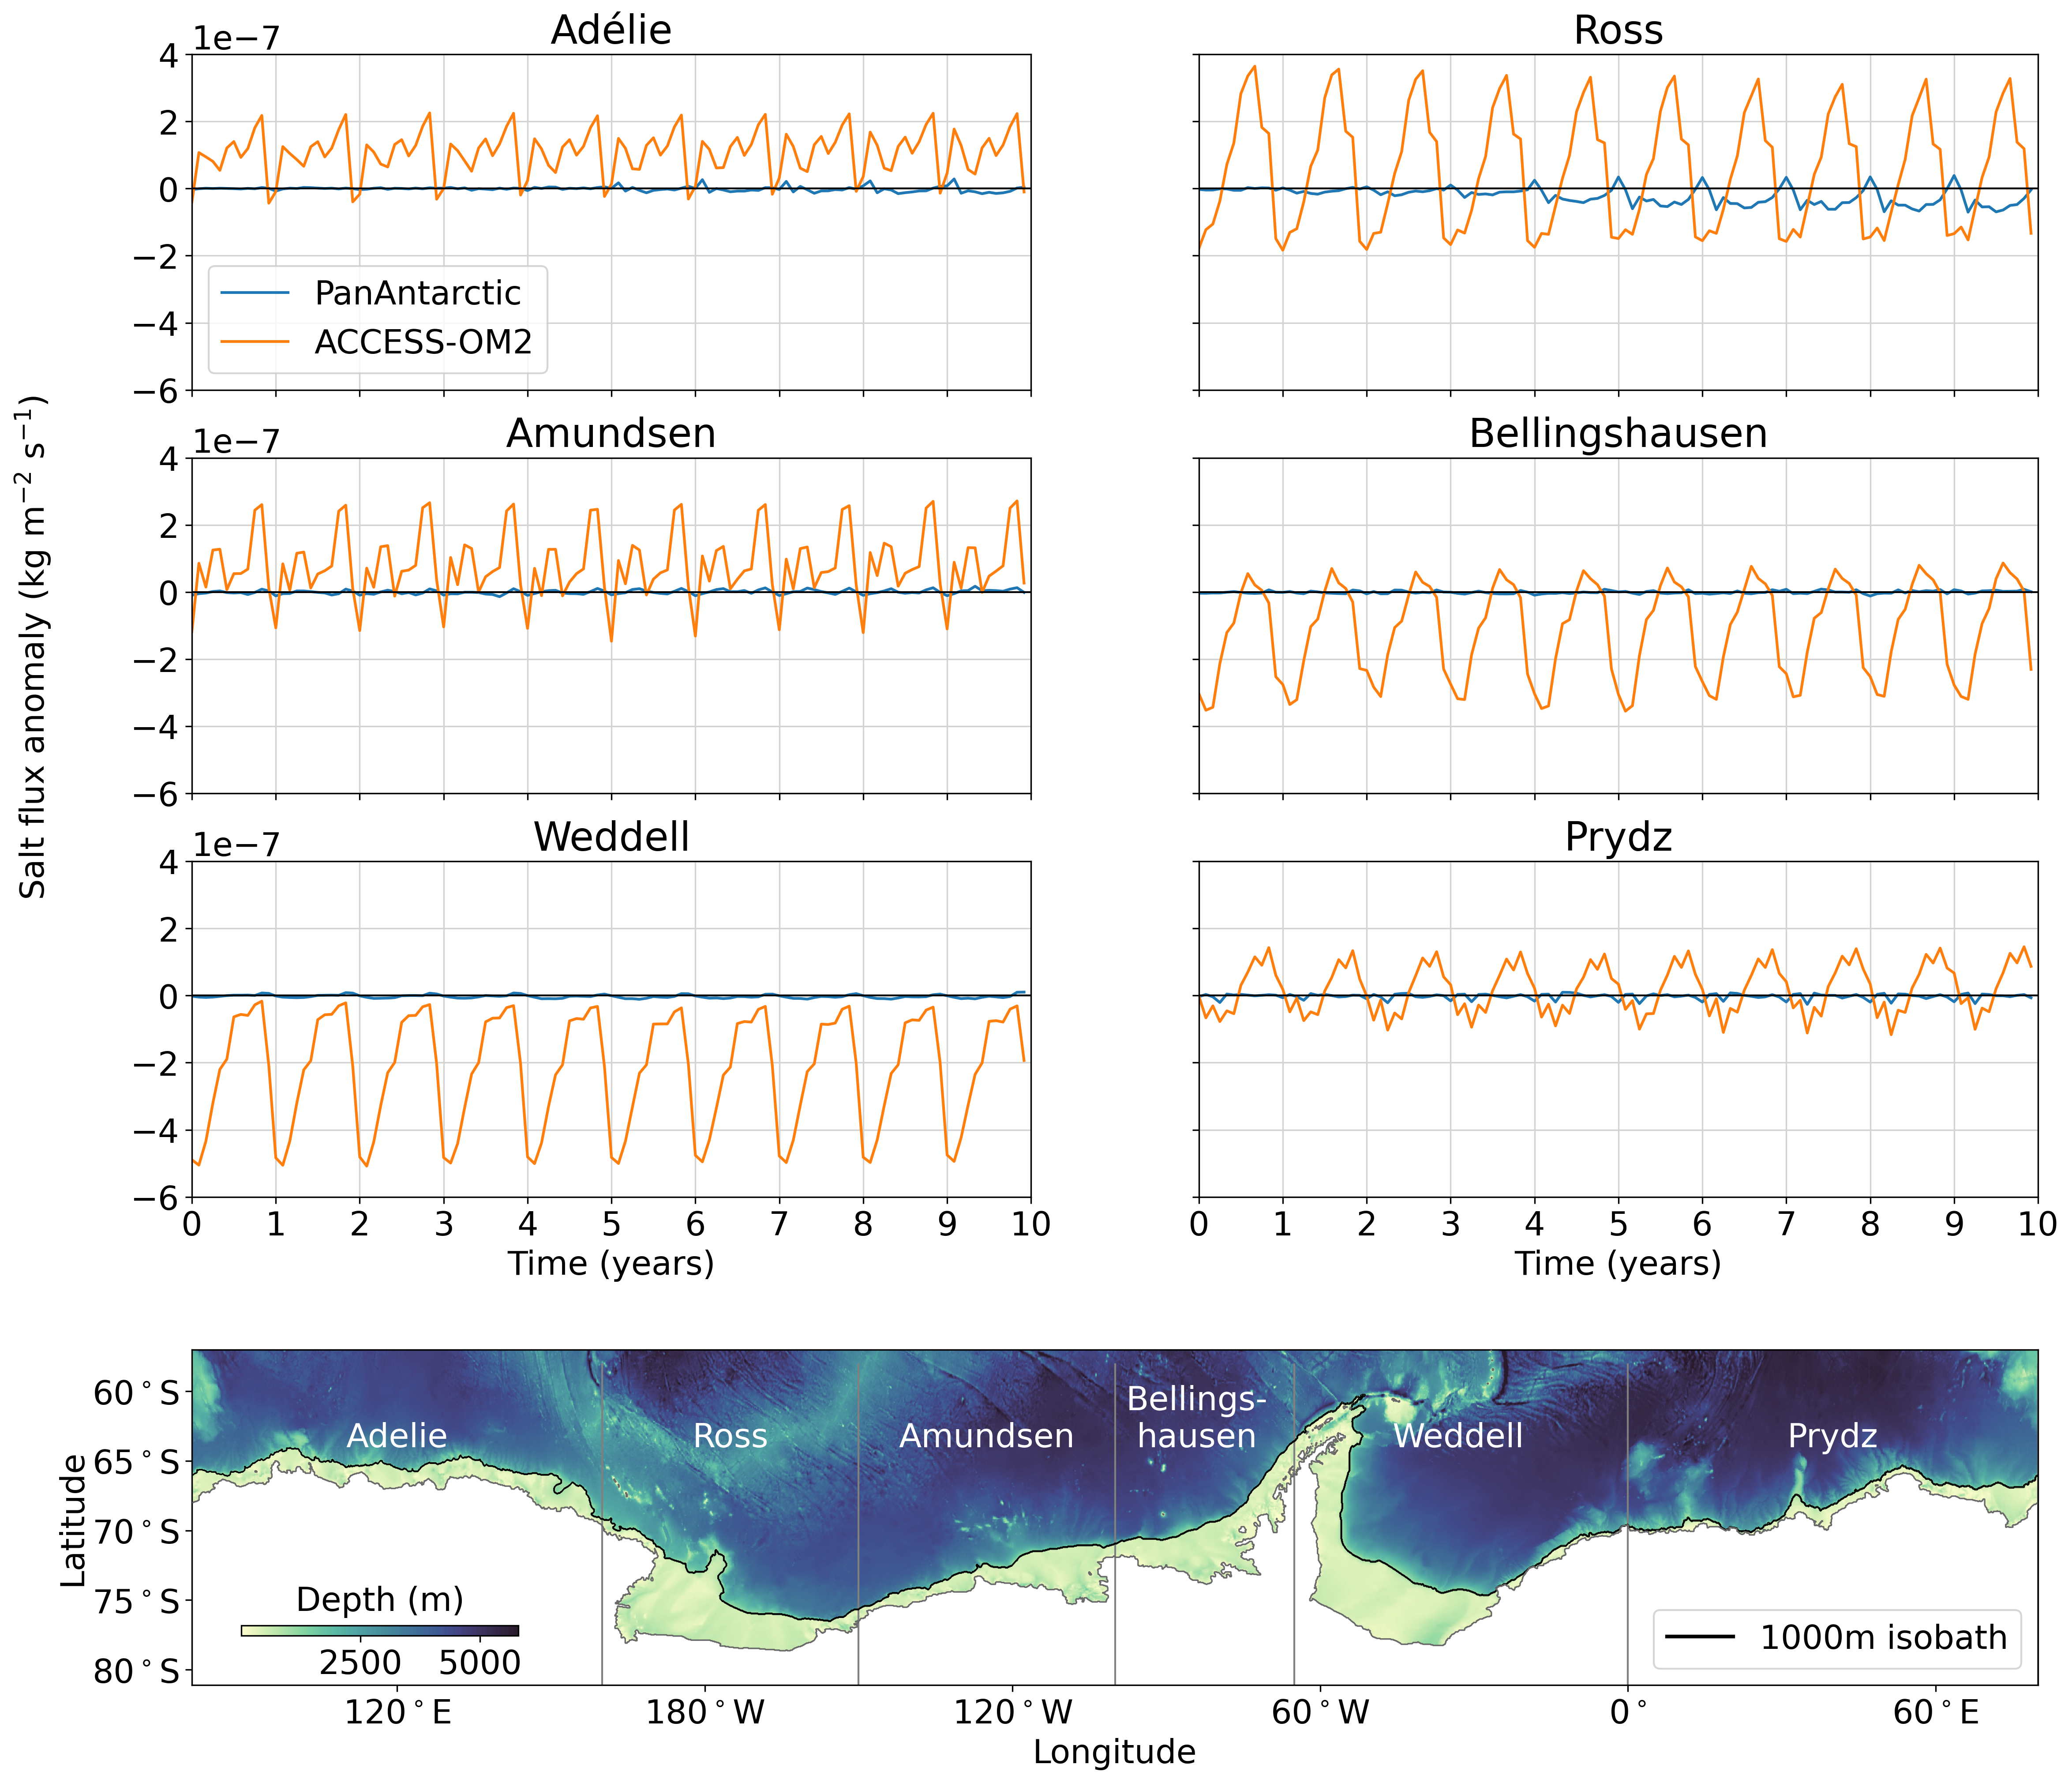

In [29]:
plt.rcParams['font.size'] = 18

# --- Create figure with 5 rows (spacer row before bathy) ---
fig = plt.figure(figsize=(18, 16), dpi=300)
gs = gridspec.GridSpec(
    nrows=5, ncols=2,
    height_ratios=[1, 1, 1, 0.05, 1],  # small spacer row before bathy
    figure=fig,
    hspace=0.25  # small space between top three rows
)

# --- Time series axes (rows 0-2) ---
axes = [fig.add_subplot(gs[i]) for i in range(6)]  # rows 0-2

# First subplot: 
pan01_topsalt_1_new.plot(ax=axes[0], label="PanAntarctic")
acc_topsalt_1_new.plot(ax=axes[0], label="ACCESS-OM2")
axes[0].legend(loc="lower left")
axes[0].set_title("Adélie")

# Second subplot: 
pan01_topsalt_2_new.plot(ax=axes[1], label="PanAntarctic")
acc_topsalt_2_new.plot(ax=axes[1], label="ACCESS-OM2")
axes[1].set_title("Ross")

# Third subplot: 
pan01_topsalt_3_new.plot(ax=axes[2], label="PanAntarctic")
acc_topsalt_3_new.plot(ax=axes[2], label="ACCESS-OM2")
axes[2].set_title("Amundsen")

# Fourth subplot: 
pan01_topsalt_4_new.plot(ax=axes[3], label="PanAntarctic")
acc_topsalt_4_new.plot(ax=axes[3], label="ACCESS-OM2")
axes[3].set_title("Bellingshausen")

# Fifth subplot: 
pan01_topsalt_5_new.plot(ax=axes[4], label="PanAntarctic")
acc_topsalt_5_new.plot(ax=axes[4], label="ACCESS-OM2")
axes[4].set_title("Weddell")

# Sixth subplot: 
pan01_topsalt_6_new.plot(ax=axes[5], label="PanAntarctic")
acc_topsalt_6_new.plot(ax=axes[5], label="ACCESS-OM2")
axes[5].set_title("Prydz")


# Apply consistent y-limits, grid, horizontal line
for ax in axes:
    ax.axhline(y=0, color='black', linewidth=1)
    ax.set_ylim(-6e-7, 4e-7)
    ax.set_xlim(0,10)
    ax.grid(True, color='lightgrey')

# Remove y-axis ticks from right column
for ax in axes[1::2]:
    ax.set_yticklabels([])

# Common Y label
fig.text(0.05, 0.6, "Salt flux anomaly (kg m$^{-2}$ s$^{-1}$)", va='center', rotation='vertical')

# X-ticks
ticks = range(0, 121, 12)
labels = [str(i) for i in range(len(ticks))]
plt.setp(axes, xticks=ticks, xticklabels=labels)

# Only bottom row gets x-axis labels
for ax in axes[:-2]:
    ax.set_xlabel("")
    ax.set_xticklabels([])
for ax in axes[-2:]:
    ax.set_xlabel("Time (years)")

# --- Bathymetry panel (fifth row, after spacer) ---
ax_bathy = fig.add_subplot(gs[4, :])  # spans both columns
h_plot = deptho.plot(ax=ax_bathy, cmap=cm.cm.deep, add_colorbar=False)

# Colorbar inside bottom-left of bathy plot, label above
cax = inset_axes(ax_bathy,
                 width="15%",    # width relative to axes
                 height="3%",    # height relative to axes
                 loc='lower left',
                 borderpad=1.5)
cbar = fig.colorbar(h_plot, cax=cax, orientation='horizontal')
cax.xaxis.set_label_position('top')
cbar.set_label("Depth (m)", labelpad=8)

# Contours
ax_bathy.contour(shelf_contour_1.cf['X'], shelf_contour_1.cf['Y'], shelf_contour_1,
                 levels=[0.5], colors='black', linewidths=0.5, zorder=4)
ax_bathy.contour(land_mask_1.cf['X'], land_mask_1.cf['Y'], land_mask_1,
                 levels=[0.5], colors='dimgrey', linewidths=0.8, zorder=5)

# Region lines + labels
ax_bathy.vlines([-280, -200, -150, -100, -65, 0, 80], -82, -58, color='grey', linewidth=1)
region_labels = ['Adelie', 'Ross', 'Amundsen', 'Bellings-\nhausen', 'Weddell', 'Prydz']
region_lons   = [-240, -175, -125, -84, -33, 40]
for x, name in zip(region_lons, region_labels):
    ax_bathy.text(x, -64.5, name, ha='center', va='bottom', color='w')

# Fake legend
ax_bathy.plot([0, 1], [0, 1], color='k', linewidth=2, label='1000m isobath')
ax_bathy.legend(loc='lower right')

# Axes labels, ticks
ax_bathy.set_ylabel('Latitude', labelpad = 2)
ax_bathy.set_xlabel('Longitude')
ax_bathy.set_ylim(min(yh.values), -57)
ax_bathy.set_xticks([-240, -180, -120, -60, 0, 60])
ax_bathy.set_xticklabels(('120$^\circ$E', '180$^\circ$W', '120$^\circ$W',
                          '60$^\circ$W', '0$^\circ$', '60$^\circ$E'))
ax_bathy.set_yticks([-80, -75, -70, -65, -60])
ax_bathy.set_yticklabels(('80$^\circ$S', '75$^\circ$S', '70$^\circ$S',
                          '65$^\circ$S', '60$^\circ$S'))

plt.tight_layout()
fig.savefig("/g/data/g40/kc5856/thesis_figures/intermodel_surfacefluxes_salt_regional.png",
            dpi=300, bbox_inches='tight')
plt.show()
